This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)



Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2914 - accuracy: 0.9150 - val_loss: 0.1545 - val_accuracy: 0.9568
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9638 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0799 - accuracy: 0.9764 - val_loss: 0.0960 - val_accuracy: 0.9715
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9830 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0799 - val_accuracy: 0.9759
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9906 - val_loss: 0.0735 - val_accuracy: 0.9783
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0768 - val_accuracy: 0.9788
Epoch 

**Plotting a validation accuracy comparison**

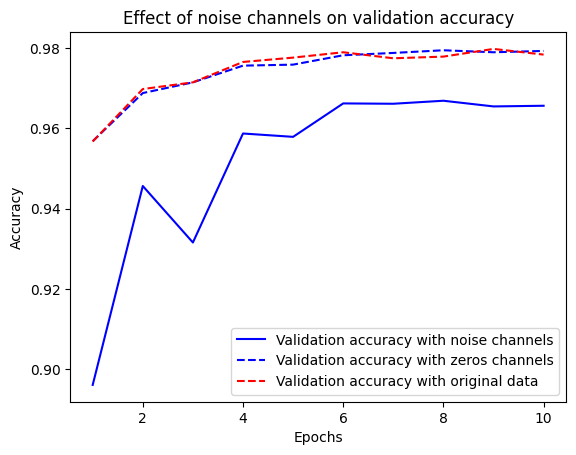

In [29]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [36]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history=model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3152 - accuracy: 0.1034 - val_loss: 2.3052 - val_accuracy: 0.1088
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2989 - accuracy: 0.1180 - val_loss: 2.3133 - val_accuracy: 0.1022
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2912 - accuracy: 0.1254 - val_loss: 2.3175 - val_accuracy: 0.1004
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2785 - accuracy: 0.1392 - val_loss: 2.3285 - val_accuracy: 0.1006
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2621 - accuracy: 0.1521 - val_loss: 2.3362 - val_accuracy: 0.1000
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2429 - accuracy: 0.1633 - val_loss: 2.3496 - val_accuracy: 0.0987
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2198 - accuracy: 0.1788 - val_loss: 2.3600 - val_accuracy: 0.1037

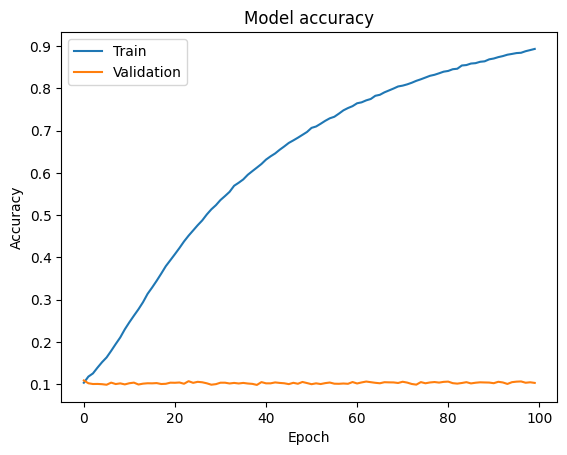

In [40]:
#1-2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [31]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 650.6528 - accuracy: 0.3134 - val_loss: 3.5595 - val_accuracy: 0.2071
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0001 - accuracy: 0.2163 - val_loss: 2.1481 - val_accuracy: 0.2817
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4494 - accuracy: 0.2086 - val_loss: 2.2968 - val_accuracy: 0.1915
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5626 - accuracy: 0.1771 - val_loss: 2.3610 - val_accuracy: 0.2083
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3471 - accuracy: 0.1926 - val_loss: 5.2349 - val_accuracy: 0.1871
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2436 - accuracy: 0.1877 - val_loss: 2.2619 - val_accuracy: 0.1875
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3378 - accuracy: 0.1831 - val_loss: 2.2367 - val_accuracy: 0.1767
Epoc

**The same model with a more appropriate learning rate**

In [32]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3549 - accuracy: 0.9108 - val_loss: 0.1819 - val_accuracy: 0.9497
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9649 - val_loss: 0.1276 - val_accuracy: 0.9646
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9736 - val_loss: 0.1215 - val_accuracy: 0.9722
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9791 - val_loss: 0.1794 - val_accuracy: 0.9690
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9820 - val_loss: 0.1521 - val_accuracy: 0.9726
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0616 - accuracy: 0.9845 - val_loss: 0.1712 - val_accuracy: 0.9732
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0501 - accuracy: 0.9883 - val_loss: 0.2803 - val_accuracy: 0.9613
Epoch 

#when model fails


In [34]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-10),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3174 - accuracy: 0.0654 - val_loss: 2.3179 - val_accuracy: 0.0690
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [42]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 2.3300 - accuracy: 0.1009 - val_loss: 2.3221 - val_accuracy: 0.1023
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3126 - accuracy: 0.1080 - val_loss: 2.3204 - val_accuracy: 0.1008
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3068 - accuracy: 0.1138 - val_loss: 2.3218 - val_accuracy: 0.1057
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.1180 - val_loss: 2.3199 - val_accuracy: 0.1006
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2994 - accuracy: 0.1221 - val_loss: 2.3203 - val_accuracy: 0.0998
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2965 - accuracy: 0.1211 - val_loss: 2.3245 - val_accuracy: 0.1023
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2953 - accuracy: 0.1230 - val_loss: 2.3232 - val_accuracy: 0.1057
Epoch 

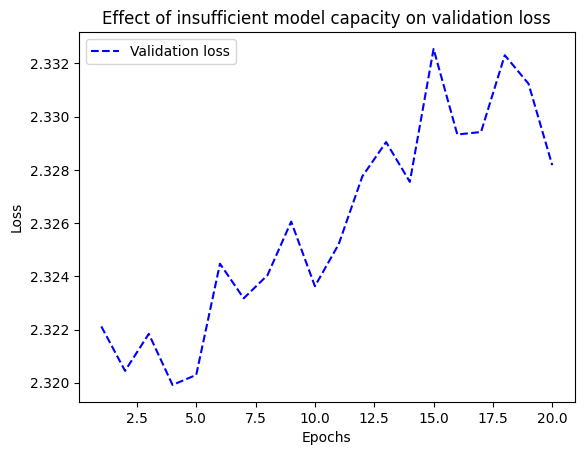

In [43]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary